# Food Recommendation Project

### An app where the user provides a dish and we recommend 5 similar dishes for the user to try  

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import NLTK and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import random

# Import WordCloud for visualization
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratishmurugan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read data

food_rec = pd.read_csv('Food_rec_data.csv')
indian_food_rec = pd.read_csv('indian_food - 4.csv')

In [3]:
# Display the first few rows of the DataFrame `food_rec` to provide an overview of the data.

food_rec.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [4]:
#Add the word "Indian" to the beginning of each course in the DataFrame `indian_food_rec`. To make the dish more relevant to the Indian cuisine.

indian_food_rec['course'] = 'Indian ' + indian_food_rec['course']
indian_food_rec.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,Indian dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,Indian dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,Indian dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,Indian dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,Indian dessert,West Bengal,East


## Data Cleaning

In [5]:
## Merge the two dataframes 
### Lets only keep the columns that we need, that is "name, describle/ingredients, diet/veg_non, c_type/course"

indian_food_rec.drop(columns=['prep_time', 'cook_time', 'flavor_profile', 'state', 'region'], axis = 1, inplace=True)
food_rec.drop('Food_ID', axis=1, inplace=True)

In [6]:
# Rename columns of food_rec to match the indian_food_rec

food_rec.rename(columns={'Name':'name', 'Describe':'ingredients', 'Veg_Non':'diet', 'C_Type':'course'}, inplace=True)
food_rec.head()

,name,course,diet,ingredients
0,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [7]:
# Reorder columns to match the desired order for merging

indian_food_rec = indian_food_rec.loc[:, ['name', 'course', 'diet', 'ingredients']]
indian_food_rec.head()

,name,course,diet,ingredients
0,Balu shahi,Indian dessert,vegetarian,"Maida flour, yogurt, oil, sugar"
1,Boondi,Indian dessert,vegetarian,"Gram flour, ghee, sugar"
2,Gajar ka halwa,Indian dessert,vegetarian,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,Indian dessert,vegetarian,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,Indian dessert,vegetarian,"Milk powder, plain flour, baking powder, ghee,..."


In [8]:
# Create a new dataframe speciallly for Arabic dishes 

arabic_dishes = pd.DataFrame({
    "name": ["Falafel", "Kunafah", "Mandi"],
    "course": ["Snack", "Dessert", "Main Course"],
    "diet": ["Veg", "Veg", "Non-Veg"],
    "ingredients": [
        "Chickpeas, parsley, coriander, garlic, onion, cumin, coriander seeds, salt, black pepper, baking soda, sesame seeds, olive oil for frying",
        "Kataifi dough, mozzarella cheese, unsalted butter, sugar, water, lemon juice, orange blossom water, ground pistachios for garnish",
        "Rice, chicken or lamb, saffron, cardamom pods, cloves, cinnamon sticks, bay leaves, onions, garlic, dried lime (loomi), cumin powder, coriander powder, salt, black pepper, ghee (clarified butter)"
    ]
})
arabic_dishes.head()

,name,course,diet,ingredients
0,Falafel,Snack,Veg,"Chickpeas, parsley, coriander, garlic, onion, ..."
1,Kunafah,Dessert,Veg,"Kataifi dough, mozzarella cheese, unsalted but..."
2,Mandi,Main Course,Non-Veg,"Rice, chicken or lamb, saffron, cardamom pods,..."


In [9]:
# Add more dishes to the arabic dishes dataframe

arabic_dishes = pd.concat([arabic_dishes, pd.DataFrame({
    "name": ["Shawarma", "Hummus", "Tabbouleh", "Baba Ganoush", "Fattoush"],
    "course": ["Main Course", "Snack", "Salad", "Snack", "Salad"],
    "diet": ["Non-Veg", "Veg", "Veg", "Veg", "Veg"],
    "ingredients": [
        "Chicken or lamb, yogurt, garlic, lemon juice, cumin, paprika, turmeric, cardamom, cinnamon, black pepper, vinegar, salt, olive oil",
        "Cooked chickpeas, tahini (sesame paste), lemon juice, garlic, olive oil, salt, paprika, cumin",
        "Bulgur wheat, parsley, mint, tomato, cucumber, green onions, lemon juice, olive oil, salt, pepper",
        "Roasted eggplant, tahini, lemon juice, garlic, olive oil, salt, parsley, smoked paprika",
        "Lettuce, tomatoes, cucumber, radishes, mint, parsley, green onions, sumac, olive oil, lemon juice, salt, pepper, toasted pita bread"
    ]
})])
arabic_dishes.head(10)

,name,course,diet,ingredients
0,Falafel,Snack,Veg,"Chickpeas, parsley, coriander, garlic, onion, ..."
1,Kunafah,Dessert,Veg,"Kataifi dough, mozzarella cheese, unsalted but..."
2,Mandi,Main Course,Non-Veg,"Rice, chicken or lamb, saffron, cardamom pods,..."
0,Shawarma,Main Course,Non-Veg,"Chicken or lamb, yogurt, garlic, lemon juice, ..."
1,Hummus,Snack,Veg,"Cooked chickpeas, tahini (sesame paste), lemon..."
2,Tabbouleh,Salad,Veg,"Bulgur wheat, parsley, mint, tomato, cucumber,..."
3,Baba Ganoush,Snack,Veg,"Roasted eggplant, tahini, lemon juice, garlic,..."
4,Fattoush,Salad,Veg,"Lettuce, tomatoes, cucumber, radishes, mint, p..."


In [10]:
# Add more dishes to the arabic dishes dataframe

arabic_dishes = pd.concat([arabic_dishes, pd.DataFrame({
    "name": ["Maqluba", "Kibbeh", "Mujaddara", "Manakeesh", "Sayadiyah", 
             "Harira", "Sambusak", "Zaatar Salad", "Shish Barak", "Umm Ali"],
    "course": ["Main Course", "Snack", "Main Course", "Snack", "Main Course", 
               "Soup", "Snack", "Salad", "Main Course", "Dessert"],
    "diet": ["Non-Veg", "Non-Veg", "Veg", "Veg", "Non-Veg", 
             "Non-Veg", "Veg", "Veg", "Non-Veg", "Veg"],
    "ingredients": [
        "Rice, chicken or lamb, potatoes, cauliflower, eggplant, tomatoes, spices",
        "Bulgur, minced onions, finely ground lean beef or lamb, Middle Eastern spices",
        "Lentils, rice, onions, cumin, olive oil",
        "Dough, za'atar, olive oil, cheese or ground meat",
        "Fish, rice, onions, spices, pine nuts",
        "Tomatoes, lentils, chickpeas, lamb, cilantro, celery, onion, spices",
        "Dough, cheese, spinach, onions, pine nuts, spices",
        "Lettuce, tomatoes, cucumber, radish, zaatar, lemon juice, olive oil",
        "Dough dumplings, minced meat, yogurt, pine nuts, coriander",
        "Puff pastry, milk, sugar, nuts, coconut flakes, raisins"
    ]
})])

arabic_dishes = pd.concat([arabic_dishes, pd.DataFrame({
    "name": ["Basbousa", "Halva", "Knafeh", "Baklava", "Qatayef", 
             "Mhalbi", "Barazek", "Falooda", "Luqaimat", "Roz Bel Laban"],
    "course": ["Dessert", "Dessert", "Dessert", "Dessert", "Dessert", 
               "Dessert", "Dessert", "Dessert", "Dessert", "Dessert"],
    "diet": ["Veg", "Veg", "Veg", "Veg", "Veg", 
             "Veg", "Veg", "Veg", "Veg", "Veg"],
    "ingredients": [
        "Semolina, coconut, yogurt, sugar, almonds",
        "Sesame paste, sugar, pistachios, cardamom",
        "Kataifi dough, sweet cheese, syrup, pistachios",
        "Phyllo pastry, nuts, honey, syrup",
        "Pancake dough, sweet cheese or nuts, sugar syrup",
        "Rice, milk, sugar, cinnamon, pistachios",
        "Sesame seeds, pistachios, honey, butter, sugar",
        "Milk, rose syrup, vermicelli, pistachios, basil seeds",
        "Flour, yeast, sugar, saffron, cardamom",
        "Rice pudding, milk, sugar, vanilla, cinnamon"
    ]
})])
    
    
# Add the name arabic to the course column to make it more relevant to the Arabic cuisine
arabic_dishes['course'] = 'Arabic ' + arabic_dishes['course']


arabic_dishes.reset_index(drop=True)

,name,course,diet,ingredients
0,Falafel,Arabic Snack,Veg,"Chickpeas, parsley, coriander, garlic, onion, ..."
1,Kunafah,Arabic Dessert,Veg,"Kataifi dough, mozzarella cheese, unsalted but..."
2,Mandi,Arabic Main Course,Non-Veg,"Rice, chicken or lamb, saffron, cardamom pods,..."
3,Shawarma,Arabic Main Course,Non-Veg,"Chicken or lamb, yogurt, garlic, lemon juice, ..."
4,Hummus,Arabic Snack,Veg,"Cooked chickpeas, tahini (sesame paste), lemon..."
5,Tabbouleh,Arabic Salad,Veg,"Bulgur wheat, parsley, mint, tomato, cucumber,..."
6,Baba Ganoush,Arabic Snack,Veg,"Roasted eggplant, tahini, lemon juice, garlic,..."
7,Fattoush,Arabic Salad,Veg,"Lettuce, tomatoes, cucumber, radishes, mint, p..."
8,Maqluba,Arabic Main Course,Non-Veg,"Rice, chicken or lamb, potatoes, cauliflower, ..."
9,Kibbeh,Arabic Snack,Non-Veg,"Bulgur, minced onions, finely ground lean beef..."


In [11]:
# Heathy dishes dataset

healthy_dishes = pd.DataFrame({
    "name": [
        "Quinoa Salad", "Grilled Salmon", "Veggie Stir Fry", "Avocado Toast", "Chia Pudding",
        "Kale Smoothie", "Grilled Chicken Salad", "Broccoli Soup", "Sweet Potato Hash", "Oatmeal Pancakes",
        "Mediterranean Bowl", "Spinach Omelette", "Turkey Wrap", "Lentil Soup", "Roasted Vegetables",
        "Cauliflower Rice", "Greek Yogurt Parfait", "Vegetable Quiche", "Stuffed Peppers", "Black Bean Burger"
    ],
    "course": [
        "Salad", "Main Course", "Main Course", "Snack", "Dessert",
        "Drink", "Salad", "Soup", "Main Course", "Breakfast",
        "Main Course", "Breakfast", "Snack", "Soup", "Side Dish",
        "Side Dish", "Dessert", "Main Course", "Main Course", "Main Course"
    ],
    "diet": [
        "Veg", "Non-Veg", "Veg", "Veg", "Veg",
        "Veg", "Non-Veg", "Veg", "Veg", "Veg",
        "Veg", "Non-Veg", "Non-Veg", "Veg", "Veg",
        "Veg", "Veg", "Veg", "Veg", "Veg"
    ],
    "ingredients": [
        "Quinoa, cherry tomatoes, cucumber, red onion, feta cheese, lemon vinaigrette",
        "Salmon fillets, olive oil, garlic, lemon, herbs",
        "Mixed vegetables, soy sauce, olive oil, garlic, ginger",
        "Whole grain bread, avocado, radish, sesame seeds, salt, pepper",
        "Chia seeds, almond milk, honey, fresh berries",
        "Kale, banana, almond milk, honey, flaxseeds",
        "Mixed greens, grilled chicken, avocado, nuts, vinaigrette",
        "Broccoli, onion, vegetable stock, cream, seasoning",
        "Sweet potatoes, onions, peppers, eggs, spices",
        "Oats, banana, eggs, honey, cinnamon",
        "Quinoa, hummus, falafel, tomato, cucumber, tahini sauce",
        "Eggs, spinach, tomatoes, cheese, herbs",
        "Whole wheat wrap, turkey breast, lettuce, tomatoes, mustard",
        "Lentils, carrots, onions, celery, tomatoes, seasoning",
        "Mixed vegetables, olive oil, garlic, herbs",
        "Cauliflower, garlic, olive oil, salt, pepper",
        "Greek yogurt, granola, honey, mixed berries",
        "Eggs, mixed vegetables, cheese, seasoning",
        "Bell peppers, quinoa, black beans, corn, cheese",
        "Black beans, breadcrumbs, spices, garlic, onion"
    ]
})


healthy_dishes = pd.concat([healthy_dishes, pd.DataFrame({
    "name": [
        "Tofu Stir Fry", "Grilled Branzino", "Kale Caesar Salad", "Banana Almond Smoothie", "Pumpkin Soup",
        "Coconut Yogurt Parfait", "Baked Cod with Lemon", "Vegetable Lentil Stew", "Apple Cinnamon Oatmeal", "Mushroom Risotto",
        "Spicy Chickpea Wraps", "Baked Trout with Herbs", "Carrot Ginger Juice", "Tomato Basil Soup", "Garlic Green Beans",
        "Zucchini Noodles", "Eggplant Rollatini", "Butternut Squash Salad", "Tempeh Reuben Sandwich", "Quinoa Stuffed Tomatoes"
    ],
    "course": [
        "Main Course", "Main Course", "Salad", "Drink", "Soup",
        "Dessert", "Main Course", "Soup", "Breakfast", "Main Course",
        "Snack", "Main Course", "Drink", "Soup", "Side Dish",
        "Main Course", "Main Course", "Salad", "Main Course", "Main Course"
    ],
    "diet": [
        "Veg", "Non-Veg", "Veg", "Veg", "Veg",
        "Veg", "Non-Veg", "Veg", "Veg", "Veg",
        "Veg", "Non-Veg", "Veg", "Veg", "Veg",
        "Veg", "Veg", "Veg", "Veg", "Veg"
    ],
    "ingredients": [
        "Tofu, mixed bell peppers, soy sauce, sesame oil, ginger",
        "Branzino, olive oil, lemon, garlic, herbs",
        "Kale, parmesan cheese, croutons, Caesar dressing",
        "Bananas, almond milk, almond butter, vanilla extract",
        "Pumpkin, onion, vegetable stock, cream, nutmeg",
        "Coconut yogurt, granola, coconut flakes, fresh mango",
        "Cod fillets, lemon zest, olive oil, parsley, garlic",
        "Lentils, carrots, celery, tomatoes, vegetable stock, spices",
        "Oats, apple, cinnamon, honey, milk",
        "Arborio rice, mushrooms, vegetable stock, parmesan cheese, garlic",
        "Chickpeas, tortilla wraps, lettuce, spicy sauce, yogurt",
        "Trout, herbs, lemon slices, olive oil, garlic",
        "Carrots, ginger, apple, lemon juice",
        "Tomatoes, basil, vegetable stock, cream, garlic",
        "Green beans, garlic, olive oil, lemon zest",
        "Zucchini, cherry tomatoes, pesto, parmesan cheese",
        "Eggplant, ricotta cheese, spinach, marinara sauce, mozzarella",
        "Butternut squash, mixed greens, cranberries, nuts, vinaigrette",
        "Tempeh, rye bread, sauerkraut, Swiss cheese, Thousand Island dressing",
        "Quinoa, tomatoes, spinach, feta cheese, olives"
    ]
})])

#Add the name heathy to the course column

healthy_dishes['course'] = 'Healthy ' + healthy_dishes['course']


healthy_dishes.reset_index(drop=True)

,name,course,diet,ingredients
0,Quinoa Salad,Healthy Salad,Veg,"Quinoa, cherry tomatoes, cucumber, red onion, ..."
1,Grilled Salmon,Healthy Main Course,Non-Veg,"Salmon fillets, olive oil, garlic, lemon, herbs"
2,Veggie Stir Fry,Healthy Main Course,Veg,"Mixed vegetables, soy sauce, olive oil, garlic..."
3,Avocado Toast,Healthy Snack,Veg,"Whole grain bread, avocado, radish, sesame see..."
4,Chia Pudding,Healthy Dessert,Veg,"Chia seeds, almond milk, honey, fresh berries"
5,Kale Smoothie,Healthy Drink,Veg,"Kale, banana, almond milk, honey, flaxseeds"
6,Grilled Chicken Salad,Healthy Salad,Non-Veg,"Mixed greens, grilled chicken, avocado, nuts, ..."
7,Broccoli Soup,Healthy Soup,Veg,"Broccoli, onion, vegetable stock, cream, seaso..."
8,Sweet Potato Hash,Healthy Main Course,Veg,"Sweet potatoes, onions, peppers, eggs, spices"
9,Oatmeal Pancakes,Healthy Breakfast,Veg,"Oats, banana, eggs, honey, cinnamon"


In [12]:
# # Convert Veg to vegetarian and Non-Veg to nonvegetarian for arabic_dishes
# for i in range(0, len(arabic_dishes['diet'])):
#     if arabic_dishes.iloc[i]['diet'] == 'Veg':
#         arabic_dishes.iloc[i]['diet'] = 'vegetarian'
#     else:
#         arabic_dishes.iloc[i]['diet'] = 'nonvegetarian'

# # Convert non vegetarian to nonvegetarian for indian_food_rec
# for i in range(0, len(indian_food_rec['diet'])):
#     if indian_food_rec.iloc[i]['diet'] == 'non vegetarian':
#         indian_food_rec.iloc[i]['diet'] = 'nonvegetarian'

# # Convert non-veg to nonvegetarian and veg to vegetarian for food_rec
# for i in range(0, len(food_rec['diet'])):
#     if food_rec.iloc[i]['diet'] == 'non-veg':
#         food_rec.iloc[i]['diet'] = 'nonvegetarian'
#     else:
#         food_rec.iloc[i]['diet'] = 'vegetarian'

# # Convert Non-Veg to nonvegetarian and Veg to vegetarian for healthy_dishes
# for i in range(0, len(healthy_dishes['diet'])):
#     if healthy_dishes.iloc[i]['diet'] == 'Non-Veg':
#         healthy_dishes.iloc[i]['diet'] = 'nonvegetarian'
#     else:
#         healthy_dishes.iloc[i]['diet'] = 'vegetarian'

# Convert "Veg" to "vegetarian" and "Non-Veg" to "nonvegetarian" for arabic_dishes
arabic_dishes['diet'] = arabic_dishes['diet'].replace({'Veg': 'vegetarian', 'Non-Veg': 'nonvegetarian'})

# Convert "non vegetarian" to "nonvegetarian" for indian_food_rec
indian_food_rec['diet'] = indian_food_rec['diet'].replace({'non vegetarian': 'nonvegetarian'})

# Convert "non-veg" to "nonvegetarian" and "veg" to "vegetarian" for food_rec
food_rec['diet'] = food_rec['diet'].replace({'non-veg': 'nonvegetarian', 'veg': 'vegetarian'})

# Convert "Non-Veg" to "nonvegetarian" and "Veg" to "vegetarian" for healthy_dishes
healthy_dishes['diet'] = healthy_dishes['diet'].replace({'Non-Veg': 'nonvegetarian', 'Veg': 'vegetarian'})


In [13]:
# Merge all three dataframes into one
all_dishes = pd.concat([indian_food_rec, food_rec, arabic_dishes, healthy_dishes], ignore_index=True).sort_values('name').reset_index(drop=True)

# Print the shape of the merged dataframe
print(all_dishes.shape)

# Display the first 10 rows of the merged dataframe
all_dishes.head(10)

(723, 4)


,name,course,diet,ingredients
0,Adhirasam,Indian dessert,vegetarian,"Rice flour, jaggery, ghee, vegetable oil, elachi"
1,Alo Achar,Nepalese,vegetarian,"boiled potatoes, peas, cucumber, mustard oil, ..."
2,Alo Tama Bodi,Nepalese,vegetarian,"bamboo shoot, black eye bean, potato"
3,Aloo gobi,Indian main course,vegetarian,"Cauliflower, potato, garam masala, turmeric, c..."
4,Aloo matar,Indian main course,vegetarian,"Potato, peas, chillies, ginger, garam masala, ..."
5,Aloo methi,Indian main course,vegetarian,"Potato, fenugreek leaves, chillies, salt, oil"
6,Aloo shimla mirch,Indian main course,vegetarian,"Potato, shimla mirch, garam masala, amchur pow..."
7,Aloo tikki,Indian main course,vegetarian,"Rice flour, potato, bread crumbs, garam masala..."
8,Alu Pitika,Indian main course,nonvegetarian,"Potatoes, mustard oil, fish, green chillies"
9,Amti,Indian main course,vegetarian,"Kala masala, arhar dal, curry leaves, mustard ..."


In [14]:
all_dishes.to_csv('all_dishes_before.csv', index=False)
all_dishes_halal = all_dishes.copy()

In [15]:
all_dishes_halal['halal'] = all_dishes.apply(lambda row: 'halal' if 'Arabic' in str(row['course']) and row['diet'] == 'nonvegetarian' else 'not_halal', axis=1)
all_dishes_halal


,name,course,diet,ingredients,halal
0,Adhirasam,Indian dessert,vegetarian,"Rice flour, jaggery, ghee, vegetable oil, elachi",not_halal
1,Alo Achar,Nepalese,vegetarian,"boiled potatoes, peas, cucumber, mustard oil, ...",not_halal
2,Alo Tama Bodi,Nepalese,vegetarian,"bamboo shoot, black eye bean, potato",not_halal
3,Aloo gobi,Indian main course,vegetarian,"Cauliflower, potato, garam masala, turmeric, c...",not_halal
4,Aloo matar,Indian main course,vegetarian,"Potato, peas, chillies, ginger, garam masala, ...",not_halal
...,...,...,...,...,...
718,watermelon and strawberry smoothie,Healthy Food,vegetarian,"fresh strawberries, honey, low fat yogurt, wat...",not_halal
719,white chocolate and lemon pastry,Dessert,vegetarian,"White chocolate, fresh cream, VIP cream, vanil...",not_halal
720,whole wheat cake,Healthy Food,vegetarian,"Oven temperature, wheat flour, jaggery sugar, ...",not_halal
721,wok tossed asparagus in mild garlic sauce,Healthy Food,vegetarian,"asparagus, 1 fried onion (medium), 1/2 tsp bre...",not_halal


In [16]:
# Filter the rows with diet = "non vegetarian"
non_vegetarian_df = all_dishes_halal[all_dishes_halal['diet'] == 'nonvegetarian']

# Randomly select 70% of these rows
sample_size = int(len(non_vegetarian_df) * 0.8)
random_indices = random.sample(list(non_vegetarian_df.index), sample_size)

# Update the halal column to "halal" for the selected rows
all_dishes_halal.loc[random_indices, 'halal'] = 'halal'
all_dishes_halal = all_dishes_halal[all_dishes_halal['halal'] == 'halal']

In [23]:
all_dishes = all_dishes_halal.copy()

### Our Dataset is ready for analysis

In [24]:
all_dishes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 8 to 707
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         166 non-null    object
 1   course       166 non-null    object
 2   diet         166 non-null    object
 3   ingredients  166 non-null    object
 4   halal        166 non-null    object
dtypes: object(5)
memory usage: 7.8+ KB


In [25]:
# Combine 'course', 'diet', and 'ingredients' columns into a single 'describe' column
all_dishes['describe'] = all_dishes['course'] + ' ' + all_dishes['diet'] + ' ' + all_dishes['ingredients'] 
#all_dishes['describe'] = all_dishes['course'] + ' ' + all_dishes['diet'] + ' ' + all_dishes['ingredients'] + ' ' + all_dishes['halal']

# Drop the now redundant 'ingredients', 'course', and 'diet' columns
all_dishes.drop(columns=['ingredients', 'course', 'diet', 'halal'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
all_dishes.head()

,name,describe
8,Alu Pitika,"Indian main course nonvegetarian Potatoes, mus..."
13,Asian Salmon Bowl with Lime Drizzle,"Thai nonvegetarian jasmine rice, garlic, butt..."
19,Baked Cod with Lemon,"Healthy Main Course nonvegetarian Cod fillets,..."
25,Bao Bun,"Chinese nonvegetarian sesame seed, all purpose..."
32,Beef Bibimbab,"Korean nonvegetarian Beef,Cucumber,carrot, mus..."


In [26]:
# Function to clean text by removing unwanted characters and converting to lowercase
def remove(text):
    text = text.lower()  # Convert text to lowercase
    text = text.replace(',', ' ')  # Replace commas with space
    text = text.replace('(', '')  # Remove opening parentheses
    text = text.replace(')', '')  # Remove closing parentheses
    text = text.replace('/', ' ')  # Replace slashes with space
    text = text.replace('-', ' ')  # Replace hyphens with space
    text = text.replace('  ', ' ')  # Replace double spaces with single space
    return text

# Function to remove stop words from text
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))  # Get the set of English stop words
    words = text.split()  # Split text into words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)  # Join words back into a single string

In [27]:
# Apply the remove function to clean the 'describe' column
all_dishes['describe'] = all_dishes['describe'].apply(remove)

# Apply the remove_stop_words function to remove stop words from the 'describe' column
all_dishes['describe'] = all_dishes['describe'].apply(remove_stop_words)

# Apply the remove function to clean the 'name' column
all_dishes['name'] = all_dishes['name'].apply(remove)

# Apply the remove_stop_words function to remove stop words from the 'name' column
all_dishes['name'] = all_dishes['name'].apply(remove_stop_words)

# Display the first few rows of the updated DataFrame
all_dishes.head()

,name,describe
8,alu pitika,indian main course nonvegetarian potatoes must...
13,asian salmon bowl lime drizzle,thai nonvegetarian jasmine rice garlic butter ...
19,baked cod lemon,healthy main course nonvegetarian cod fillets ...
25,bao bun,chinese nonvegetarian sesame seed purpose flou...
32,beef bibimbab,korean nonvegetarian beef cucumber carrot mush...


### Word Cloud

Lets visualize the most common words (ingredients) as a word cloud.

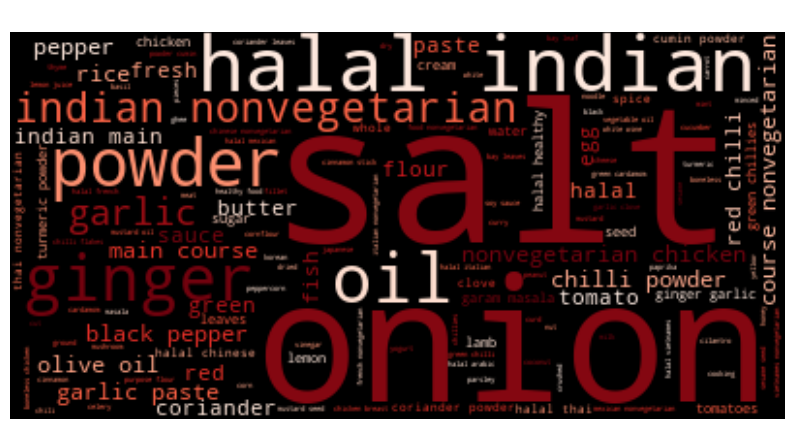

In [28]:
# Extract the 'describe' column values from the DataFrame as a numpy array
titles = all_dishes['describe'].values

# Join all the descriptions into a single string
text = ' '.join(titles)

# Generate a word cloud from the text
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Most Common Words in Dish Descriptions', color='white')
plt.show()

## Export the dataset

Lets export the data to build the Recommendation system

In [29]:
# Save the merged DataFrame to a CSV file
all_dishes.to_csv('all_dishes.csv', index=False)